# EDA previo de los datos

En primer lugar vamos importar los datos necesarios para nuestro análisis exploratorio. Usaremos para última versión del modelo el conjunto de datos de 2023 para entrenar el modelo y después el conjunto de 2024 para realizar los test.

In [1]:
import pandas as pd
import openpyxl

train_df = pd.read_excel('data/final_data/CAT_SPAM_2023_E.xlsx')
test_df = pd.read_excel('data/final_data/CAT_SPAM_2024_E.xlsx')

In [2]:
train_df.head()

,CodigoTarea,IDEmail,De,Cuerpo,Categoria
0,NaN,1464096,info@news.seleccionfiguras.com,\t_x000d_\n\tSi vous ne parvenez pas à lire ce...,SPAM
1,NaN,1464106,hanson@dyparking.co.kr,\tAlgunos contactos que recibieron este mensaj...,SPAM
2,NaN,1464124,m.michel@mp.aconclue-pro.com,Ce message vous est adressé par Manageo pour l...,SPAM
3,NaN,1464127,sandra-de-rgpd@veml02.com,"Bonjour M. RENASSIA, _x000d_\n_x000d_\n_x000d_...",SPAM
4,NaN,1464148,staff.news@cepartscatalog.it,<https://nl.cepartsoftware.com/MCP53133623730...,SPAM


In [3]:
test_df.head()

,CodigoTarea,IDEmail,De,Cuerpo,Categoria
0,NaN,1669549,mail@notes.conquetemarche.com,\t_x000d_\n\tSi vous ne parvenez pas à lire ce...,SPAM
1,NaN,1669559,KAISEODEVELOPER@outlook.com,"Hi,_x000d_\n_x000d_\nI can help your website t...",SPAM
2,NaN,1669568,m.michel@mp.aconclue-pro.com,Ce message vous est adressé par Manageo pour l...,SPAM
3,NaN,1669577,Violaliza.Abad@us.kbr.com,Proprietary \ KBR confidential_x000d_\n_x000d_...,SPAM
4,NaN,1669745,info@newsnook24.com,Si vous ne parvenez pas à visualiser cet email...,SPAM


In [11]:
train_df[train_df['Categoria'] == 'OMOD']

,CodigoTarea,IDEmail,De,Cuerpo,Categoria
1,1034918.0,1464101,david.moya@schindler.com,"Buenos días,_x000d_\n_x000d_\n _x000d_\n_x000d...",OMOD
3,1034934.0,1464117,c.zaballos@imem.com,\t_x000d_\n\t_x000d_\n <http://imem.com/wp-con...,OMOD
4,1034936.0,1464119,projektowanie@global-lift.pl,"Dear Sirs,_x000d_\n_x000d_\n _x000d_\n_x000d_\...",OMOD
6,1034943.0,1464126,keltuvai@paradis.lt,"Dear Sirs,_x000d_\n_x000d_\n _x000d_\n_x000d_\...",OMOD
7,1034947.0,1464130,diogoviegas.pimenta@schindler.com,Bom dia _x000d_\n_x000d_\n _x000d_\n_x000d_\nN...,OMOD
...,...,...,...,...,...
17812,1174542.0,1669104,david.fernandez@schindler.com,"Buenas tardes,_x000d_\n_x000d_\n _x000d_\n_x00...",OMOD
17821,1174659.0,1669267,biuro@global-lift.pl,"Dear Sirs,_x000d_\n_x000d_\n _x000d_\n_x000d_\...",OMOD
17836,1174754.0,1669430,a.gallardo@hidral.fr,Buenas:_x000d_\npara este PH necesito precio d...,OMOD
17837,1174767.0,1664941,sso09@orona-group.com,"Buenas tardes,_x000d_\n_x000d_\n _x000d_\n_x00...",OMOD


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63871 entries, 0 to 63870
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CodigoTarea  57611 non-null  float64
 1   IDEmail      63871 non-null  int64  
 2   De           63869 non-null  object 
 3   Cuerpo       63729 non-null  object 
 4   Categoria    63871 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.4+ MB


In [5]:
train_df['Categoria'].value_counts()

Categoria
OMOD    11733
SEG     11012
OREP     7763
PREP     6651
PMOD     6382
SPAM     6260
I        5885
SAT      5461
DOC      1248
C        1211
D         265
Name: count, dtype: int64

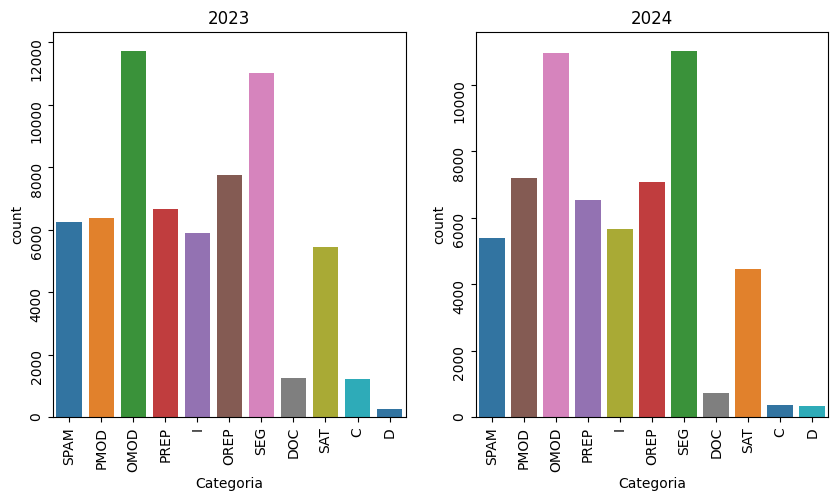

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

sns.countplot(ax=ax[0], x=train_df.Categoria, hue=train_df.Categoria, palette="tab10")
ax[0].set_title("2023")
ax[0].tick_params(rotation=90)
sns.countplot(ax=ax[1], x=test_df.Categoria, hue=test_df.Categoria, palette="tab10")
ax[1].set_title("2024")
ax[1].tick_params(rotation=90)

Sin embargo estos datos son irreales ya que tenemos que agrupar por código de tarea de tal manera que solo tomemos el primer correo de cada una de las tareas. Así podremos empezar a trabajar.

In [7]:
# Filtrar filas donde 'CodigoTarea' no es nulo
train_df_non_null = train_df[train_df['CodigoTarea'].notnull()]

# Agrupar solo las filas donde 'CodigoTarea' no es nulo
train_df_grouped = train_df_non_null.groupby(by='CodigoTarea').agg({
    'IDEmail': 'first',
    'De': 'first',
    'Cuerpo': 'first',
    'Categoria': 'first'
}).reset_index()

# Concatenar las filas agrupadas con las filas donde 'CodigoTarea' es nulo
train_df_null = train_df[train_df['CodigoTarea'].isnull()]
train_df = pd.concat([train_df_grouped, train_df_null], ignore_index=True)

In [8]:
# Filtrar filas donde 'CodigoTarea' no es nulo
test_df_non_null = test_df[test_df['CodigoTarea'].notnull()]

# Agrupar solo las filas donde 'CodigoTarea' no es nulo
test_df_grouped = test_df_non_null.groupby(by='CodigoTarea').agg({
    'IDEmail': 'first',
    'De': 'first',
    'Cuerpo': 'first',
    'Categoria': 'first'
}).reset_index()

# Concatenar las filas agrupadas con las filas donde 'CodigoTarea' es nulo
test_df_null = test_df[test_df['CodigoTarea'].isnull()]
test_df = pd.concat([test_df_grouped, test_df_null], ignore_index=True)

Una vez realizados estos agrupamientos ya podremos crear de nuevo nuestros gráficos. Además vamos a eliminar el SPAM, ya que los datos que le vamos a pasar a nuestro modelo no llevarán el SPAM si no que serán ya correos que no son SPAM. 

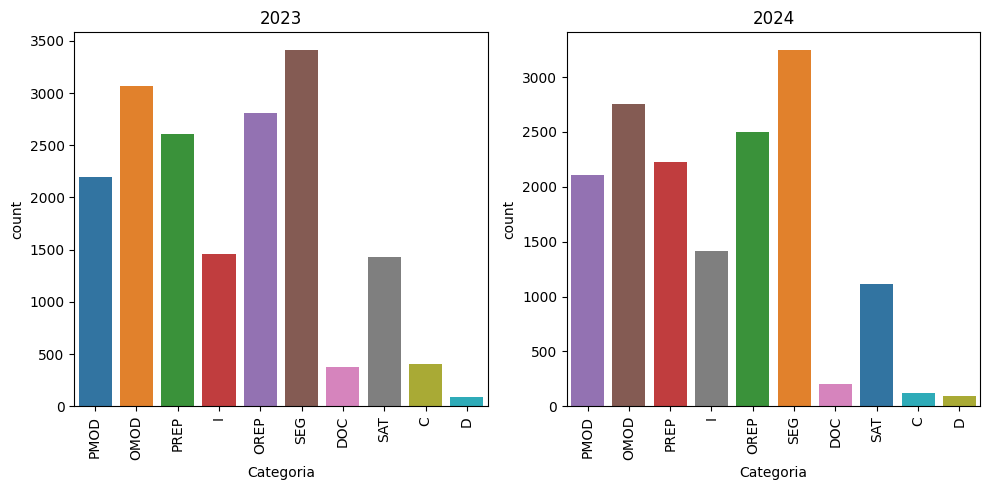

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las filas donde la categoría no es 'SPAM'
train_df_filtered = train_df[train_df['Categoria'] != 'SPAM']
test_df_filtered = test_df[test_df['Categoria'] != 'SPAM']

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

sns.countplot(ax=ax[0], x=train_df_filtered['Categoria'], hue=train_df_filtered['Categoria'], palette="tab10")
ax[0].set_title("2023")
ax[0].tick_params(axis='x', rotation=90)

sns.countplot(ax=ax[1], x=test_df_filtered['Categoria'], hue=test_df_filtered['Categoria'], palette="tab10")
ax[1].set_title("2024")
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Ahora veremos los gráficos para los datos que son SPAM o no SPAM

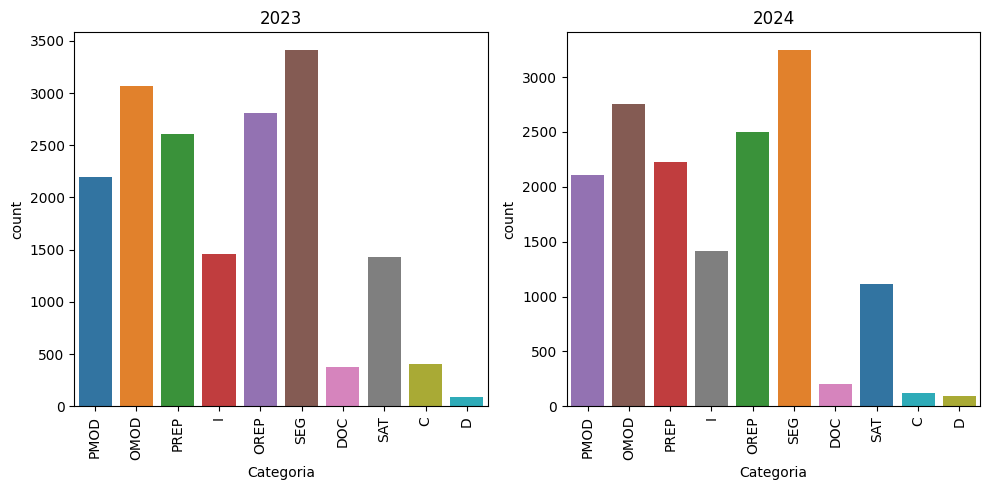

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las filas donde la categoría no es 'SPAM'
train_df_no_spam = train_df[train_df['Categoria'] != 'SPAM']
test_df_no_spam = test_df[test_df['Categoria'] != 'SPAM']

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

sns.countplot(ax=ax[0], x=train_df_filtered['Categoria'], hue=train_df_filtered['Categoria'], palette="tab10")
ax[0].set_title("2023")
ax[0].tick_params(axis='x', rotation=90)

sns.countplot(ax=ax[1], x=test_df_filtered['Categoria'], hue=test_df_filtered['Categoria'], palette="tab10")
ax[1].set_title("2024")
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()